### Data loading and pre-processing

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, f1_score, homogeneity_score, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import GridSearchCV
import time
from sklearn.mixture import GaussianMixture 
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats import t as student
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder


[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]
[0 1 2]


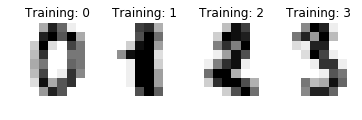

In [209]:
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
dataset_values = X
y=digits.target
print(X[0:3])
print(y[0:3])

In [4]:
# Standardize data
X = preprocessing.scale(X)

# Split into training and test data. Use random_state to get the same results in every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)

## Part 1: Clustering

In [21]:
classes=[0,1,2,3,4,5,6,7,8,9]

def vote_cluster_class(classes, labels, y, K): #y is the labelled output set, labels is the index of 
                                               #cluster associated for each x
    count=[np.zeros(len(classes)) for i in range(K)] #k is the number of clusters
    for i in range(len(labels)):
        k=labels[i]
        for j in range(len(count[k])):
            if classes[j]==y[i]:
                count[k][j]+=1
                break
                
    #pred is the predicted class of hte cluster
    pred=[]          
    for k in range(len(count)): #for each cluster
        
        max=count[k][0]
        index=0
        
        for i in range(len(count[k])):#for each possible class
            if max<count[k][i]:
                max=count[k][i]
                index=i
        pred.append(classes[index])
    y_vote_cluster=[]    
    for i in range(len(y)):
        y_vote_cluster.append(pred[labels[i]])
    return pred, y_vote_cluster     #y_vote_cluster = label estimated after clustering, #pred = label of eac cluster

### K-means

In [64]:
def k_means(X,y):

    kclusters = list(np.arange(10,50,2))
    sil_scores = []; f1_scores = []; homo_scores = []; train_times = []
    labels = []
    cluster_labels=[]
    for k in kclusters:
        t0 = time.time()
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=10,n_jobs=-1).fit(X)
        t1 = time.time()
        train_times.append(t1-t0)
        sil_scores.append(silhouette_score(X, kmeans.labels_))
        pred, y_vote_cluster = vote_cluster_class([0,1,2,3,4,5,6,7,8,9], kmeans.labels_, y, k)
        f1_scores.append(f1_score(y, y_vote_cluster,average=None))
        homo_scores.append(homogeneity_score(y, kmeans.labels_))
        labels.append(kmeans.labels_)
        cluster_labels.append(pred)
        
    return kclusters, sil_scores, f1_scores, homo_scores, train_times, cluster_labels

In [65]:
kclusters, sil_scores, f1_scores, homo_scores, train_times, cluster_label = k_means(X,y)


C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn

In [66]:
print(cluster_label[0])

[2, 8, 3, 1, 4, 6, 2, 7, 7, 0]


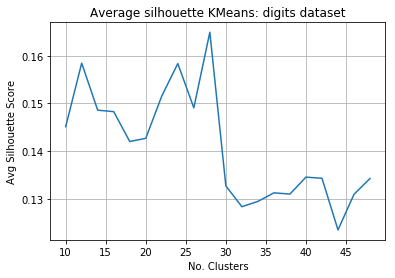

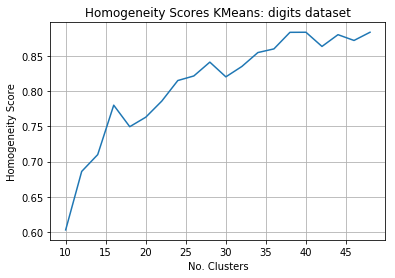

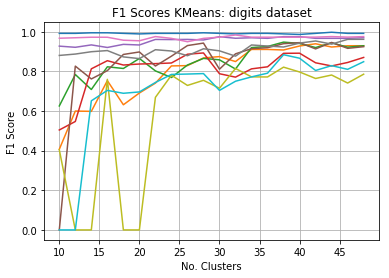

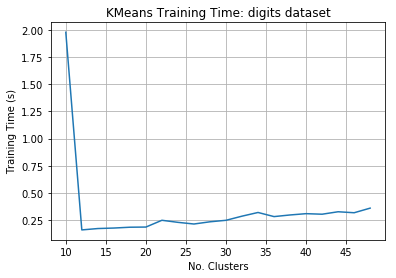

In [45]:
def plot_curve_k_means(kclusters, sil_scores, f1_scores, homo_scores, train_times, Title):
    # elbow curve for silhouette score
    dataset = 'digits dataset'

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, sil_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Average silhouette KMeans'+Title+': ' + dataset)
    plt.show()

    # plot homogeneity scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, homo_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores KMeans'+Title+': '+dataset)
    plt.show()


    # plot f1 scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, f1_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('F1 Score')
    plt.title('F1 Scores KMeans'+Title+': '+dataset)
    plt.show()

    # plot model training time
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, train_times)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Training Time (s)')
    plt.title('KMeans Training Time'+Title+': ' +dataset)
    plt.show()
plot_curve_k_means(kclusters, sil_scores, f1_scores, homo_scores, train_times,"")

### Gaussian Mixture Model (EM)

In [90]:
def EM(X,y):

    kdist = list(np.arange(2,200,5))
    sil_scores = []; f1_scores = []; homo_scores = []; training_times = []; aic_scores = []; bic_scores = []
    cluster_labels=[]
    for n in kdist:
        t0 = time.time()        
        em = GaussianMixture(n_components=n,covariance_type='full',n_init=1,warm_start=True,random_state=10).fit(X)
        t1 = time.time()
        training_times.append(t1-t0)        
        labels = em.predict(X)
        sil_scores.append(silhouette_score(X, labels))
        pred, y_vote_cluster = vote_cluster_class([0,1,2,3,4,5,6,7,8,9], labels, y, n)
        f1_scores.append(f1_score(y, y_vote_cluster,average=None))
        homo_scores.append(homogeneity_score(y, labels))
        aic_scores.append(em.aic(X))
        bic_scores.append(em.bic(X))
        cluster_labels.append(pred)
        
    return sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores, cluster_labels

In [91]:
sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores, cluster_labels_em= EM(X,y)

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


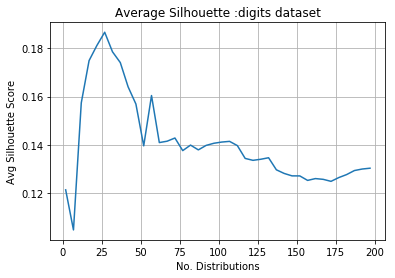

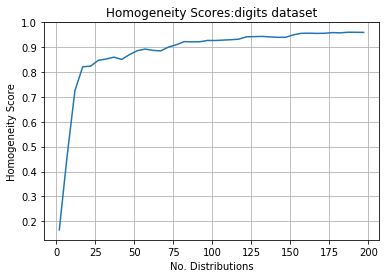

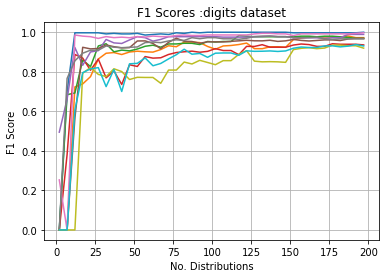

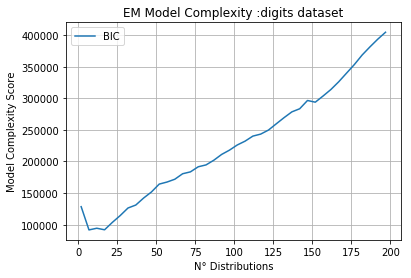

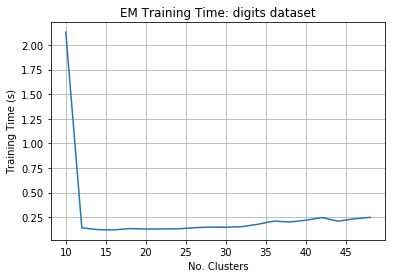

In [127]:
dataset = 'digits dataset'
def plot_curves_EM(sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,Title ):
    
    kdist = list(np.arange(2,200,5))
    # elbow curve for silhouette score
    fig = plt.figure()
    plt.plot(kdist, sil_scores)
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Average Silhouette '+Title+':' +dataset)
    plt.show()

    # plot homogeneity scores
    fig = plt.figure()
    plt.plot(kdist, homo_scores)
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores'+Title+':' +dataset)
    plt.show()

    # plot f1 scores
    fig = plt.figure()
    plt.plot(kdist, f1_scores)
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('F1 Score')
    plt.title('F1 Scores '+Title+':' +dataset)
    plt.show()

    # plot model AIC and BIC
    fig = plt.figure()
   # plt.plot(kdist, aic_scores, label='AIC')
    plt.plot(kdist, bic_scores,label='BIC')
    plt.grid(True)
    plt.xlabel('N° Distributions')
    plt.ylabel('Model Complexity Score')
    plt.title('EM Model Complexity '+Title+':' +dataset)
    plt.legend(loc="best")
    plt.show()

    
    
    # plot model training time
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, train_times)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Training Time (s)')
    plt.title('EM Training Time'+Title+': ' +dataset)
    plt.show()
    
plot_curves_EM(sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,'')
#print(cluster_labels_em)

## Part 2: Dimentionality reduction
### PCA

In [122]:
# Make an instance of the Model
def principalcomponentanalysis(X,y):
    Xpca=X.copy()
    y1=y.copy()
    #pca=PCA(0.95)
    pca = PCA(0.9) #sk-learn will choose the minimum number of principal component such that 95% of the variance is retained
    pca.fit(Xpca)
    Xpca=pca.transform(X)
    explained_variance_ratio= pca.explained_variance_ratio_
    #components = pca.components_
    nb_components = explained_variance_ratio.size
    cumulative_variance = np.cumsum(explained_variance_ratio)
    X_projected = pca.inverse_transform(Xpca)
    loss = ((X - X_projected) ** 2).mean()
    return (cumulative_variance, nb_components,explained_variance_ratio, loss )



In [124]:
cumulative_variance, nb_components,explained_variance_ratio, loss  = principalcomponentanalysis(X,y)

Text(0.5, 1.0, 'Cumulative vairiance:digits dataset')

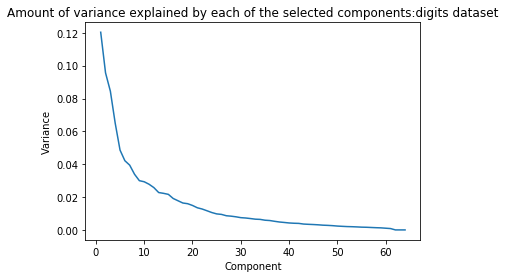

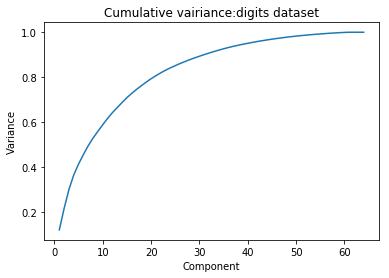

In [97]:
plt.figure()
plt.plot(np.arange(1, nb_components+1), explained_variance_ratio)
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Amount of variance explained by each of the selected components:' + dataset)


plt.figure()
plt.plot(np.arange(1, nb_components+1), cumulative_variance)
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Cumulative vairiance:' + dataset)


In [125]:
print(loss)

0.09487000241752752


### ICA

In [130]:
from scipy.stats import kurtosis
def ica(X,y):
    nb_components = list(np.arange(2,(X.shape[1]),2)) # The number of components to retain 
    kurto = []
    for n in nb_components:
        ica = FastICA(n_components=n)
        X1 = ica.fit_transform(X)
        k= np.abs(kurtosis((np.array(X1))))
        k= np.average(k)       
        kurto.append(k)
    return kurto, nb_components

In [132]:
kurto, nb_components = ica(X,y)

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not conv

Text(0.5, 1.0, 'ICA Kurtosis:digits dataset')

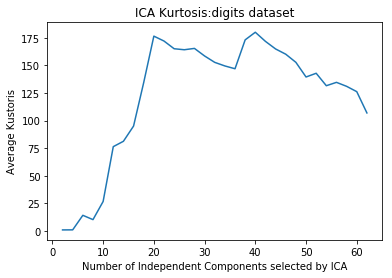

In [134]:

plt.figure()

plt.plot(nb_components, kurto)
#plt.xticks(nb_components)
plt.xlabel('Number of Independent Components selected by ICA')
plt.ylabel('Average Kustoris')
plt.title('ICA Kurtosis:' + dataset)

### RCA: random component analysis (Randomized projection)

In [192]:

def distanceCovariance(X1,X2):

    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

def randomized_projection(X,y,k):
    nb_components = list(np.arange(2,(X.shape[1]),2))
    a = [np.zeros(len(nb_components)) for i in range(k)] #We will test k random restarts
    mean=[]
    student=[]
    X_rp=[[]for i in range(k)]
    #K = [np.random.RandomState(42) for i in range(k)]
    #print(K)
    for i in range(k):
        for j in range(len(nb_components)):
            #rp = SparseRandomProjection(n_components=nb_components[i], random_state=K[i])
            rp = SparseRandomProjection(n_components=nb_components[j], random_state=i)
            X1=rp.fit_transform(X)
            X_rp[i].append(X1)           
            a[i][j]=distanceCovariance(X1,X)
        #print(X_rp[i])    
    a = pd.DataFrame(a).T
    student = a.std(axis=1).tolist()
    mean = a.mean(axis=1).tolist()
    
    return (mean, student, nb_components, X_rp, a)
        
    

In [193]:
mean_rp, student_rp, nb_components_rp, X_rp, a = randomized_projection(X,y,5)

In [198]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

accuracy = [[] for i in range(len(X_rp))]

unit = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)

for i in range(len(X_rp)):
    for j in range (len(X_rp[i])):
        X_train, X_test, y_train, y_test = train_test_split(X_rp[i][j],y, test_size=0.30)
        clf_boosted = AdaBoostClassifier(base_estimator=unit, random_state=7)
        clf_boosted.fit(X_train, y_train)
        y_pred = clf_boosted.predict(X_test)
        accuracy[i].append(accuracy_score(y_test, y_pred))


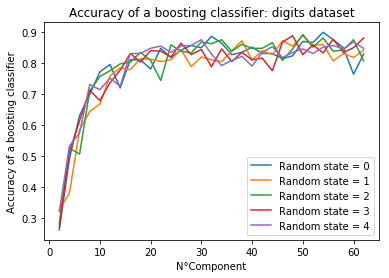

In [196]:
#print(accuracy)
plt.figure()
for i in range(len(accuracy)):
    plt.plot(nb_components_rp, accuracy[i], label='Random state = '+str(i))
plt.ylabel('Accuracy of a boosting classifier')
plt.xlabel('N°Component')
plt.title('Accuracy of a boosting classifier: ' + dataset)
plt.legend(loc="best")

Text(0.5, 1.0, 'Student Reconstruction Correlation: digits dataset')

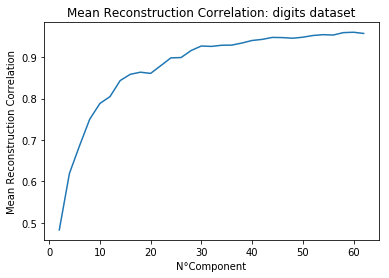

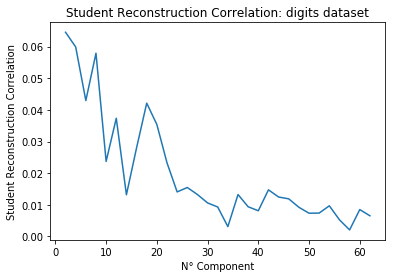

In [197]:
plt.figure()

plt.plot(nb_components_rp, mean_rp)
#plt.xticks(nb_components_rp)
plt.ylabel('Mean Reconstruction Correlation')
plt.xlabel('N°Component')
plt.title('Mean Reconstruction Correlation: ' + dataset)

plt.figure()
plt.plot(nb_components_rp, student_rp)
#plt.xticks(nb_components_rp)
plt.ylabel('Student Reconstruction Correlation')
plt.xlabel('N° Component')
plt.title('Student Reconstruction Correlation: ' + dataset)



### Random forest classifier


In [264]:
def random_forest_classifier(X,y): 
    index_features=np.arange(0,len(X[0])).tolist()
    random_forest= RandomForestClassifier(n_estimators=100, max_depth=10) 
    random_forest.fit(X,y)
    features = random_forest.feature_importances_
    a=[index_features,features.tolist()]
    features = pd.DataFrame(a , index=['index','feature_importance'])    
    features=features.T
    #print(features)
    features1  = features.sort_values('feature_importance', ascending=[False])
   # print(features1)
    index = features1.index.tolist()
    feature_importance= features1.feature_importance.tolist()
    
    sum = 0
    i=0
    while sum<0.9: #we want to keep 90% of the "information" 
        sum += feature_importance[i]
        i+=1
    top_importance= feature_importance[0:i]
    top_columns= index[0:i]

            
        
    return index ,feature_importance, features.feature_importance.tolist(), top_columns, top_importance


In [271]:
index, ordered_feature_importance, feature_importance,top_columns, top_importance = random_forest_classifier(X,y)

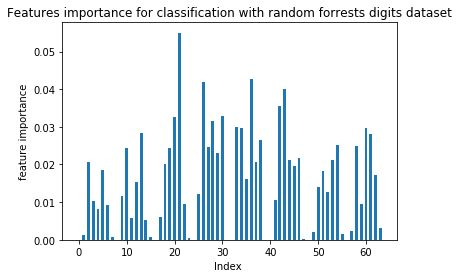

In [272]:
a =np.arange(0,64).tolist()
plt.figure()
plt.bar(a, feature_importance,0.6)
plt.ylabel('feature importance')
plt.xlabel('Index ')
plt.title('Features importance for classification with random forrests ' + dataset)
plt.show()

In [273]:
print(len(top_columns)) # we remove 29 columns

35


### Part 3: Dimensionality reduction + clustering

In [230]:
#X_pca = PCA(0.9).fit_transform(X)
X_ica= FastICA(n_components=20).fit_transform(X)
X_rp = SparseRandomProjection(n_components=20).fit_transform(X)
X_rfc=[]
dataset_values=pd.DataFrame(dataset_values)
for i in top_columns:
    X_rfc.append(dataset_values[i].values)
X_rfc = pd.DataFrame(X_rfc).T.values
X_rfc=preprocessing.scale(X_rfc)
print(X.shape, X_pca.shape, X_ica.shape, X_rp.shape, X_rfc.shape)
#print(X.shape, X_ica.shape)
#rfc_phish = np.array(rfc_phish.values,dtype='int64')

(1797, 64) (1797, 31) (1797, 20) (1797, 20) (1797, 32)


### K-means + PCA

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


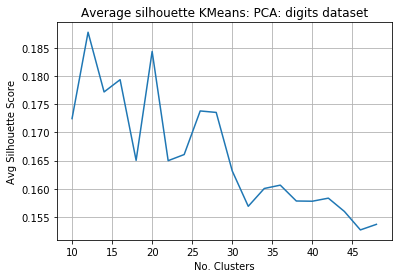

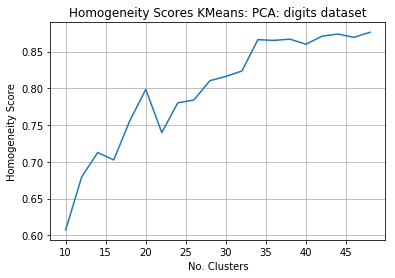

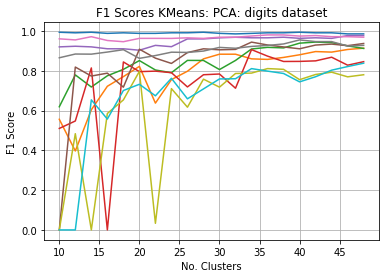

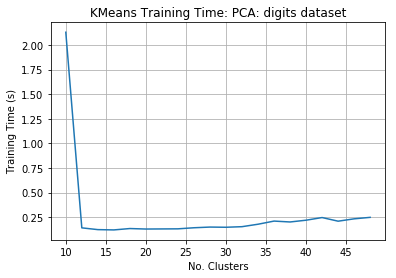

In [109]:
kclusters, sil_scores, f1_scores, homo_scores, train_times, cluster_labels_pca_km =k_means(X_pca,y)
plot_curve_k_means(kclusters, sil_scores, f1_scores, homo_scores, train_times, ': PCA')

In [114]:
print(cluster_labels_pca_km[3])

[0, 2, 6, 5, 4, 1, 9, 7, 1, 7, 6, 2, 8, 4, 1, 2]


### K-means + ICA

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn

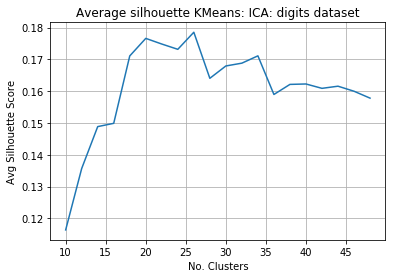

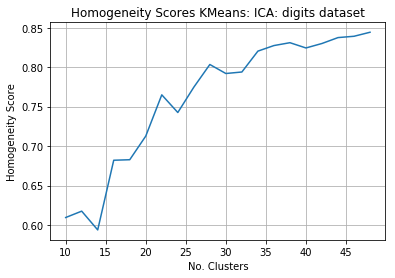

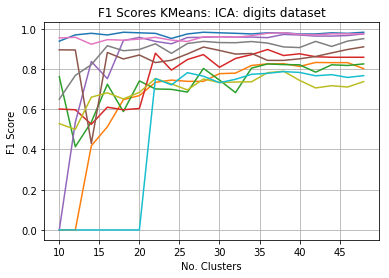

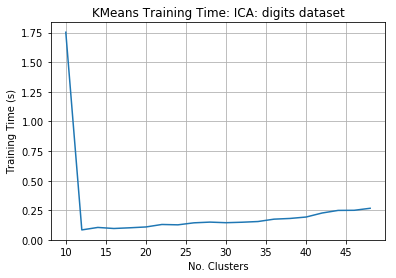

In [136]:
kclusters, sil_scores, f1_scores, homo_scores, train_times, cluster_labels_ica_km=k_means(X_ica,y)
plot_curve_k_means(kclusters, sil_scores, f1_scores, homo_scores, train_times,': ICA')

### K-means + RP

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


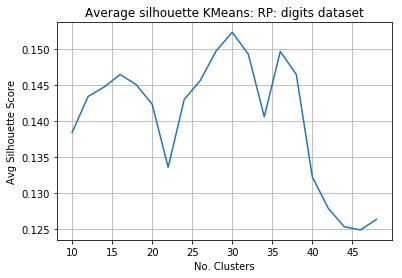

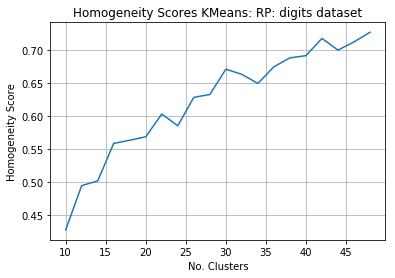

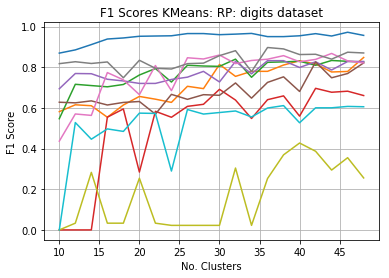

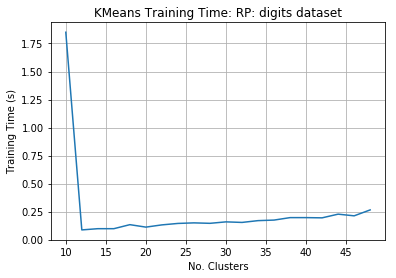

In [200]:
kclusters, sil_scores, f1_scores, homo_scores, train_times, cluster_labels_rp_km=k_means(X_rp,y)
plot_curve_k_means(kclusters, sil_scores, f1_scores, homo_scores, train_times,': RP')

### K-means + RFC

In [245]:
kclusters, sil_scores, f1_scores, homo_scores, train_times, cluster_labels_rfc_km=k_means(X_rfc,y)

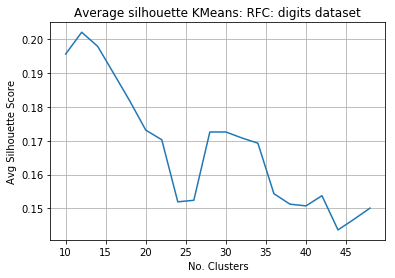

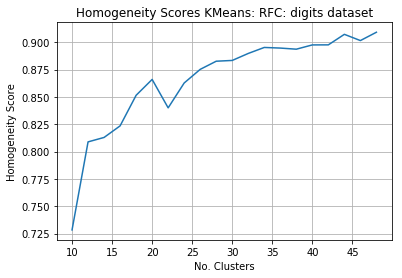

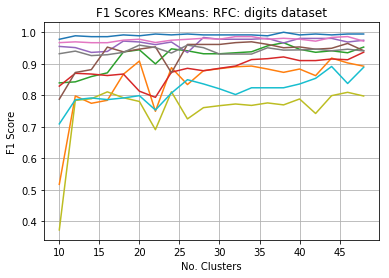

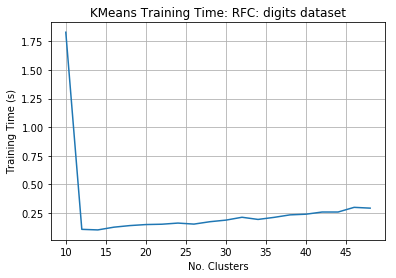

In [246]:
plot_curve_k_means(kclusters, sil_scores, f1_scores, homo_scores, train_times,': RFC')

### EM + PCA

In [116]:
sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,cluster_labels_pca_em=EM(X_pca,y)

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


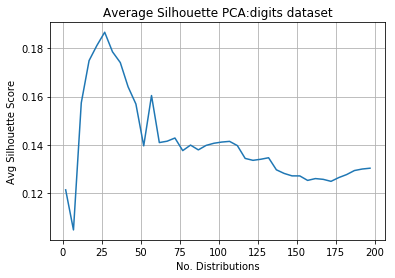

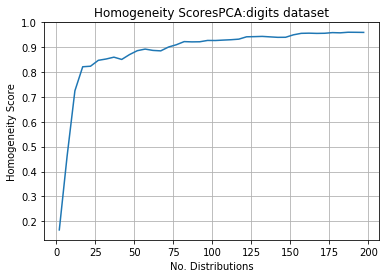

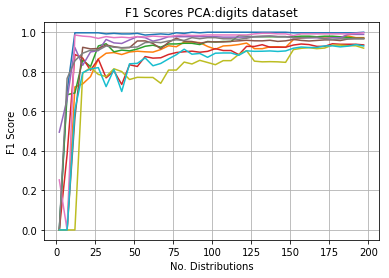

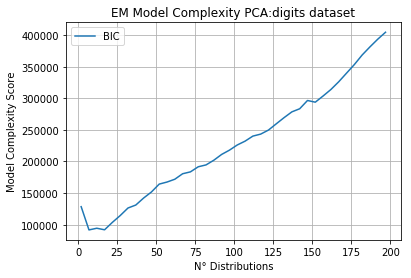

In [119]:
plot_curves_EM(sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,'PCA')

### EM + ICA

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


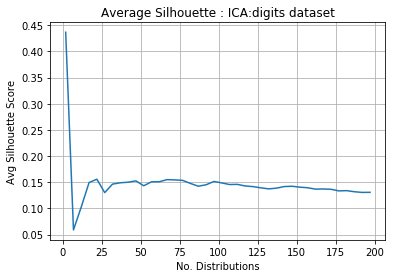

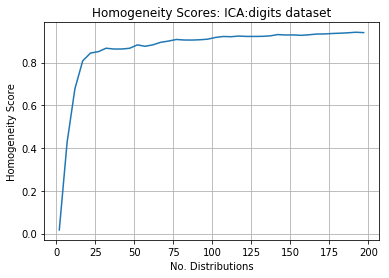

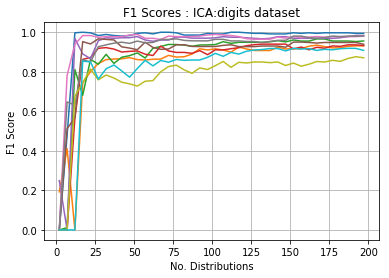

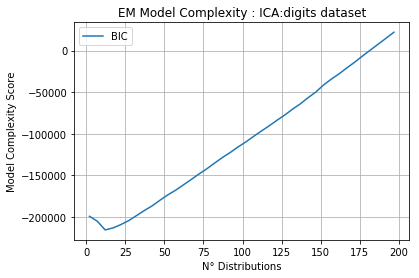

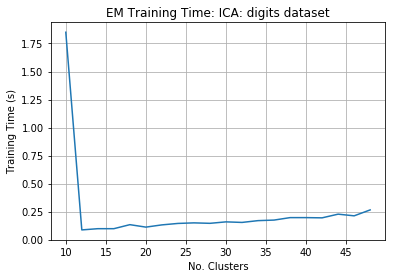

In [201]:
em_ica=EM(X_ica,y)
sil_scores=em_ica[0]
f1_scores=em_ica[1]
homo_scores=em_ica[2]
train_times=em_ica[3]
aic_scores=em_ica[4]
bic_scores=em_ica[5]
plot_curves_EM(sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,': ICA')

### EM + RP

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


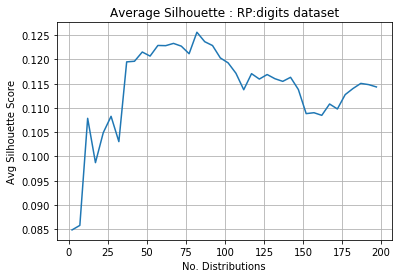

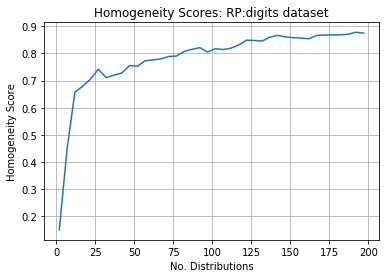

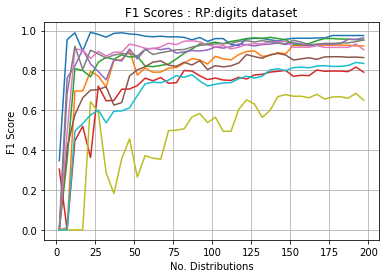

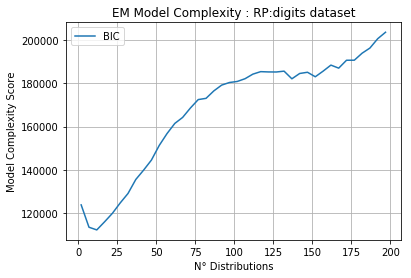

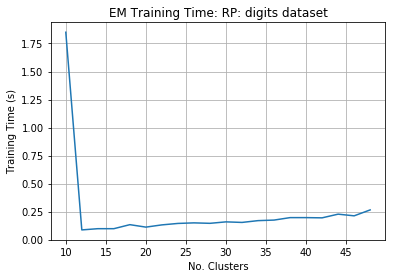

In [202]:
em_rp=EM(X_rp,y)
sil_scores=em_rp[0]
f1_scores=em_rp[1]
homo_scores=em_rp[2]
train_times=em_rp[3]
aic_scores=em_rp[4]
bic_scores=em_rp[5]
plot_curves_EM(sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,': RP')

### EM + RFC

C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


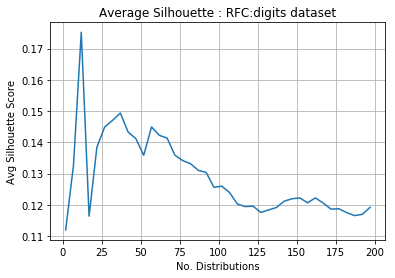

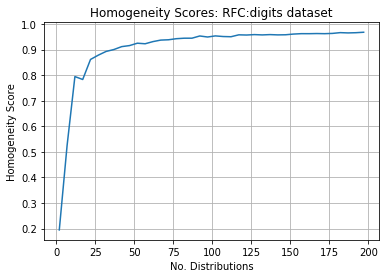

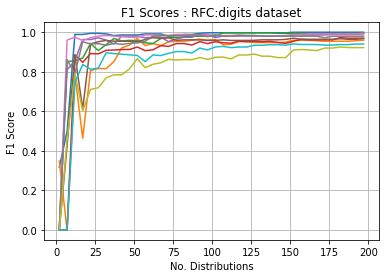

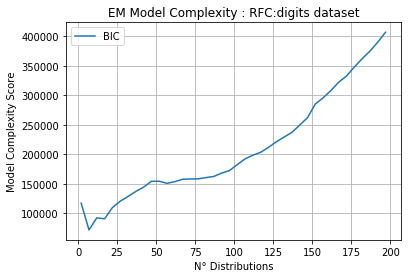

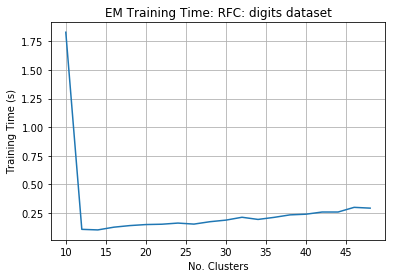

In [247]:
em_rfc=EM(X_rfc,y)
sil_scores=em_rfc[0]
f1_scores=em_rfc[1]
homo_scores=em_rfc[2]
train_times=em_rfc[3]
aic_scores=em_rfc[4]
bic_scores=em_rfc[5]

plot_curves_EM(sil_scores,f1_scores, homo_scores, train_times, aic_scores, bic_scores,': RFC')